#### Requirements and Imports

In [ ]:
!pip install ultralytics -q
!pip install roboflow -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.3/887.3 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.2 MB/s eta 0:00:00


In [ ]:
import os
import glob
import torch
import shutil
from roboflow import Roboflow
from ultralytics import RTDETR
from IPython.display import display, Image

from google.colab import drive
drive.mount('/content/drive')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Mounted at /content/drive


#### Dataset

In [ ]:
rf = Roboflow(api_key="MHamEhAkUYUWDEpRhEj3")
project = rf.workspace("try2-q1oef").project("solar-module-thermal-anaylsis-it5sj")
version = project.version(2)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Solar-Module-Thermal-Anaylsis-2 in yolov8:: 100%|██████████| 768/768 [00:00<00:00, 2932.69it/s]


In [ ]:
data= f'{dataset.location}/data.yaml'
print(data)

/content/Solar-Module-Thermal-Anaylsis-2/data.yaml


#### Model Training

* Reduce batch size (try **8** or **4**).
* Reduce image size (`imgsz`), such as **416** or **320**.
* Enable mixed precision training with `half=True`.

In [ ]:
model = RTDETR("rtdetr-l.pt")
model.train(
    data=data,
    epochs=50,
    imgsz=640,
    batch=16,
    lr0=0.0005,
    lrf=0.01,
    plots=True,
    half=True
)

100%|██████████| 63.4M/63.4M [00:00<00:00, 94.4MB/s]


Ultralytics 8.3.36 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=rtdetr-l.pt, data=/content/Solar-Module-Thermal-Anaylsis-2/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=True, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, sh

100%|██████████| 755k/755k [00:00<00:00, 20.3MB/s]


Overriding model.yaml nc=80 with nc=6
WARNING ⚠️ no model scale passed. Assuming scale='l'.

                   from  n    params  module                                       arguments                     
  0                  -1  1     25248  ultralytics.nn.modules.block.HGStem          [3, 32, 48]                   
  1                  -1  6    155072  ultralytics.nn.modules.block.HGBlock         [48, 48, 128, 3, 6]           
  2                  -1  1      1408  ultralytics.nn.modules.conv.DWConv           [128, 128, 3, 2, 1, False]    
  3                  -1  6    839296  ultralytics.nn.modules.block.HGBlock         [128, 96, 512, 3, 6]          
  4                  -1  1      5632  ultralytics.nn.modules.conv.DWConv           [512, 512, 3, 2, 1, False]    
  5                  -1  6   1695360  ultralytics.nn.modules.block.HGBlock         [512, 192, 1024, 5, 6, True, False]
  6                  -1  6   2055808  ultralytics.nn.modules.block.HGBlock         [1024, 192, 1024, 5, 

100%|██████████| 5.35M/5.35M [00:00<00:00, 79.9MB/s]


AMP: checks passed ✅


train: Scanning /content/Solar-Module-Thermal-Anaylsis-2/train/labels... 302 images, 0 backgrounds, 0 corrupt: 100%|██████████| 302/302 [00:00<00:00, 1294.39it/s]

train: New cache created: /content/Solar-Module-Thermal-Anaylsis-2/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/Solar-Module-Thermal-Anaylsis-2/valid/labels... 38 images, 0 backgrounds, 0 corrupt: 100%|██████████| 38/38 [00:00<00:00, 694.15it/s]

val: New cache created: /content/Solar-Module-Thermal-Anaylsis-2/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0005' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 143 weight(decay=0.0), 206 weight(decay=0.0005), 226 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/19 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:91.)
       1/50      13.6G      1.287      26.58      1.118         45        640: 100%|██████████| 19/19 [00:26<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.13s/it]

                   all         38         58      0.476    0.00714     0.0107    0.00577



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/19 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:91.)
       2/50      13.4G     0.7885      2.235     0.5271         46        640: 100%|██████████| 19/19 [00:22<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.28it/s]

                   all         38         58     0.0521      0.135     0.0692     0.0336



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/19 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:91.)
       3/50      13.5G     0.6905      1.438     0.4999         61        640: 100%|██████████| 19/19 [00:23<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.55it/s]

                   all         38         58      0.417      0.372      0.102     0.0685



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/19 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:91.)
       4/50      13.4G     0.6372      1.443     0.4443         61        640: 100%|██████████| 19/19 [00:23<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.22it/s]


                   all         38         58      0.646      0.217     0.0859     0.0605

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/19 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:91.)
       5/50      13.5G      0.551      1.431     0.3374         69        640: 100%|██████████| 19/19 [00:23<00:00,  1.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.49it/s]

                   all         38         58      0.531      0.312      0.196      0.125



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/19 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:91.)
       6/50      13.6G     0.4803      1.518     0.3122         61        640: 100%|██████████| 19/19 [00:23<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.19it/s]


                   all         38         58      0.387      0.349      0.267      0.153

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/19 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:91.)
       7/50      13.3G     0.4815      1.241     0.2825         54        640: 100%|██████████| 19/19 [00:22<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.48it/s]

                   all         38         58      0.335      0.424      0.364      0.237



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/19 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:91.)
       8/50      13.5G      0.474     0.9715     0.3047         39        640: 100%|██████████| 19/19 [00:22<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.61it/s]

                   all         38         58      0.702      0.488      0.504      0.348



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/19 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:91.)
       9/50      13.3G     0.4066     0.9094     0.2302         35        640: 100%|██████████| 19/19 [00:22<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.41it/s]

                   all         38         58      0.735      0.416      0.421      0.295



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/19 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:91.)
      10/50      13.7G     0.4399     0.8529     0.2631         45        640: 100%|██████████| 19/19 [00:23<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.17it/s]


                   all         38         58      0.802      0.484      0.526      0.368

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/19 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:91.)
      11/50      13.5G     0.4252      0.865     0.2424         59        640: 100%|██████████| 19/19 [00:22<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.17it/s]

                   all         38         58      0.691      0.536      0.539      0.357



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/19 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:91.)
      12/50      13.5G     0.3749     0.8014     0.2237         68        640: 100%|██████████| 19/19 [00:23<00:00,  1.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.55it/s]

                   all         38         58      0.861      0.529      0.552       0.38



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/19 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:91.)
      13/50      13.3G     0.4045     0.7142     0.2469         45        640: 100%|██████████| 19/19 [00:22<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.47it/s]

                   all         38         58      0.591      0.722      0.638      0.472



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/19 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:91.)
      14/50      13.4G      0.381     0.7709     0.2304         67        640: 100%|██████████| 19/19 [00:23<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.44it/s]

                   all         38         58      0.769      0.501       0.52       0.35



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/19 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:91.)
      15/50      13.4G     0.3527     0.7239     0.2048         54        640: 100%|██████████| 19/19 [00:22<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.52it/s]

                   all         38         58      0.773      0.744      0.773      0.555



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/19 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:91.)
      16/50      13.5G     0.3631     0.6927     0.1962         58        640: 100%|██████████| 19/19 [00:22<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.26it/s]


                   all         38         58      0.698       0.73      0.731      0.515

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/19 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:91.)
      17/50      13.3G     0.3271     0.6235     0.1928         39        640: 100%|██████████| 19/19 [00:22<00:00,  1.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.43it/s]

                   all         38         58      0.608       0.75      0.658      0.457



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/19 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:91.)
      18/50      13.5G      0.341      0.616     0.2151         50        640: 100%|██████████| 19/19 [00:23<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.50it/s]

                   all         38         58      0.697      0.781        0.7      0.508



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/19 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:91.)
      19/50      13.4G      0.333       0.64     0.1837         82        640: 100%|██████████| 19/19 [00:22<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.53it/s]

                   all         38         58      0.725      0.627      0.723      0.496



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/19 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:91.)
      20/50      13.4G      0.343     0.6341     0.1966         44        640: 100%|██████████| 19/19 [00:23<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.22it/s]


                   all         38         58      0.627      0.716      0.607      0.432

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/19 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:91.)
      21/50      13.4G     0.3318     0.6138     0.1842         55        640: 100%|██████████| 19/19 [00:22<00:00,  1.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.17it/s]


                   all         38         58      0.682      0.702       0.58      0.423

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/19 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:91.)
      22/50      13.5G     0.3324     0.5836     0.1921         54        640: 100%|██████████| 19/19 [00:23<00:00,  1.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.48it/s]

                   all         38         58      0.856      0.736       0.74      0.544



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/19 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:91.)
      23/50      13.4G     0.3392     0.5541     0.2041         49        640: 100%|██████████| 19/19 [00:22<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.29it/s]


                   all         38         58      0.585      0.757      0.752      0.529

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/19 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:91.)
      24/50      13.5G      0.323     0.5639     0.1878         45        640: 100%|██████████| 19/19 [00:23<00:00,  1.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.55it/s]

                   all         38         58      0.908      0.718      0.774      0.558



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/19 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:91.)
      25/50      13.4G     0.3171     0.5626     0.1869         43        640: 100%|██████████| 19/19 [00:23<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]


                   all         38         58      0.911      0.669      0.775      0.555

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/19 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:91.)
      26/50      13.4G     0.3065     0.5401     0.1738         58        640: 100%|██████████| 19/19 [00:22<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.49it/s]

                   all         38         58      0.878      0.745      0.757      0.543



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/19 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:91.)
      27/50      13.4G     0.3293     0.5834     0.1886         44        640: 100%|██████████| 19/19 [00:22<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.48it/s]

                   all         38         58      0.855      0.743      0.778      0.556



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/19 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:91.)
      28/50      13.5G     0.3316     0.5582     0.1893         61        640: 100%|██████████| 19/19 [00:22<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.26it/s]


                   all         38         58      0.899      0.695      0.728      0.515

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/19 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:91.)
      29/50      13.3G     0.2968     0.5349     0.1768         43        640: 100%|██████████| 19/19 [00:22<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.48it/s]

                   all         38         58       0.87      0.695       0.74      0.539



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/19 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:91.)
      30/50      13.5G     0.3101     0.5149     0.1608         58        640: 100%|██████████| 19/19 [00:23<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.49it/s]

                   all         38         58      0.891      0.713      0.738       0.54



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/19 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:91.)
      31/50      13.4G     0.3108     0.5038     0.1751         33        640: 100%|██████████| 19/19 [00:22<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.16it/s]

                   all         38         58      0.871      0.639      0.705      0.509



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/19 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:91.)
      32/50      13.5G     0.2983     0.5195     0.1599         48        640: 100%|██████████| 19/19 [00:22<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.58it/s]

                   all         38         58      0.915      0.693      0.734       0.53



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/19 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:91.)
      33/50      13.4G     0.2934      0.502     0.1773         48        640: 100%|██████████| 19/19 [00:23<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.52it/s]

                   all         38         58      0.842      0.483      0.531      0.381



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/19 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:91.)
      34/50      13.7G     0.3066     0.5179     0.2006         50        640: 100%|██████████| 19/19 [00:22<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.51it/s]

                   all         38         58      0.901      0.709      0.755      0.544



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/19 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:91.)
      35/50      13.5G      0.308     0.4915     0.1766         66        640: 100%|██████████| 19/19 [00:22<00:00,  1.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.42it/s]

                   all         38         58      0.925      0.691      0.733      0.535



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/19 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:91.)
      36/50      13.5G     0.2953     0.4765     0.1658         51        640: 100%|██████████| 19/19 [00:23<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.54it/s]

                   all         38         58      0.919      0.692      0.733      0.533



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/19 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:91.)
      37/50      13.3G     0.2929     0.4753     0.1658         39        640: 100%|██████████| 19/19 [00:22<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.20it/s]

                   all         38         58      0.912      0.716      0.769      0.563



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/19 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:91.)
      38/50      13.6G     0.2815      0.476     0.1684         42        640: 100%|██████████| 19/19 [00:22<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.40it/s]

                   all         38         58      0.932      0.723      0.783      0.575



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/19 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:91.)
      39/50      13.4G     0.2919     0.4801     0.1713         42        640: 100%|██████████| 19/19 [00:22<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.45it/s]

                   all         38         58      0.913      0.721      0.777      0.568



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/19 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:91.)
      40/50      13.5G     0.2845     0.4658      0.169         61        640: 100%|██████████| 19/19 [00:23<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.56it/s]

                   all         38         58      0.927      0.699      0.771      0.564


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/19 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:91.)
      41/50      13.4G      0.246       0.44     0.1605         43        640: 100%|██████████| 19/19 [00:23<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.47it/s]

                   all         38         58       0.93      0.709      0.771      0.563



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/19 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:91.)
      42/50      13.5G     0.2495     0.3885     0.1737         24        640: 100%|██████████| 19/19 [00:22<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.41it/s]

                   all         38         58      0.941      0.723      0.811      0.599



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/19 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:91.)
      43/50      13.7G     0.2432     0.3871     0.1647         26        640: 100%|██████████| 19/19 [00:23<00:00,  1.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.21it/s]

                   all         38         58       0.94      0.737      0.816      0.606



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/19 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:91.)
      44/50      13.5G     0.2431     0.3979      0.182         30        640: 100%|██████████| 19/19 [00:22<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.18it/s]


                   all         38         58      0.899      0.728      0.782      0.576

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/19 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:91.)
      45/50      13.4G     0.2394     0.3891     0.1652         34        640: 100%|██████████| 19/19 [00:22<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.49it/s]

                   all         38         58      0.813      0.744      0.783       0.57



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/19 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:91.)
      46/50      13.4G     0.2375     0.3742     0.1613         29        640: 100%|██████████| 19/19 [00:22<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.21it/s]


                   all         38         58      0.879      0.709      0.776      0.571

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/19 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:91.)
      47/50      13.5G     0.2209     0.3622     0.1384         32        640: 100%|██████████| 19/19 [00:22<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.44it/s]

                   all         38         58      0.902      0.699      0.773      0.573



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/19 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:91.)
      48/50      13.5G     0.2199     0.3499     0.1469         30        640: 100%|██████████| 19/19 [00:22<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.29it/s]


                   all         38         58      0.912      0.698      0.788      0.583

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/19 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:91.)
      49/50      13.4G     0.2313     0.3748     0.1531         28        640: 100%|██████████| 19/19 [00:22<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.54it/s]

                   all         38         58       0.77      0.796      0.795      0.589



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/19 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:91.)
      50/50      13.5G     0.2232     0.3559     0.1449         26        640: 100%|██████████| 19/19 [00:22<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.22it/s]

                   all         38         58      0.904      0.717       0.76      0.559



50 epochs completed in 0.401 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 66.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 66.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.36 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
rt-detr-l summary: 502 layers, 31,996,070 parameters, 0 gradients, 103.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.91it/s]


                   all         38         58      0.941      0.737      0.815      0.604
            multi-cell          5         10          1      0.552      0.698      0.608
          open-circuit          7         15      0.952      0.867      0.926      0.671
         short-circuit          3          4          1        0.3      0.497      0.414
           single-cell         26         28      0.847      0.964      0.961      0.626
             substring          1          1      0.904          1      0.995      0.701
Speed: 0.2ms preprocess, 19.9ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b36cd0bf4f0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
        

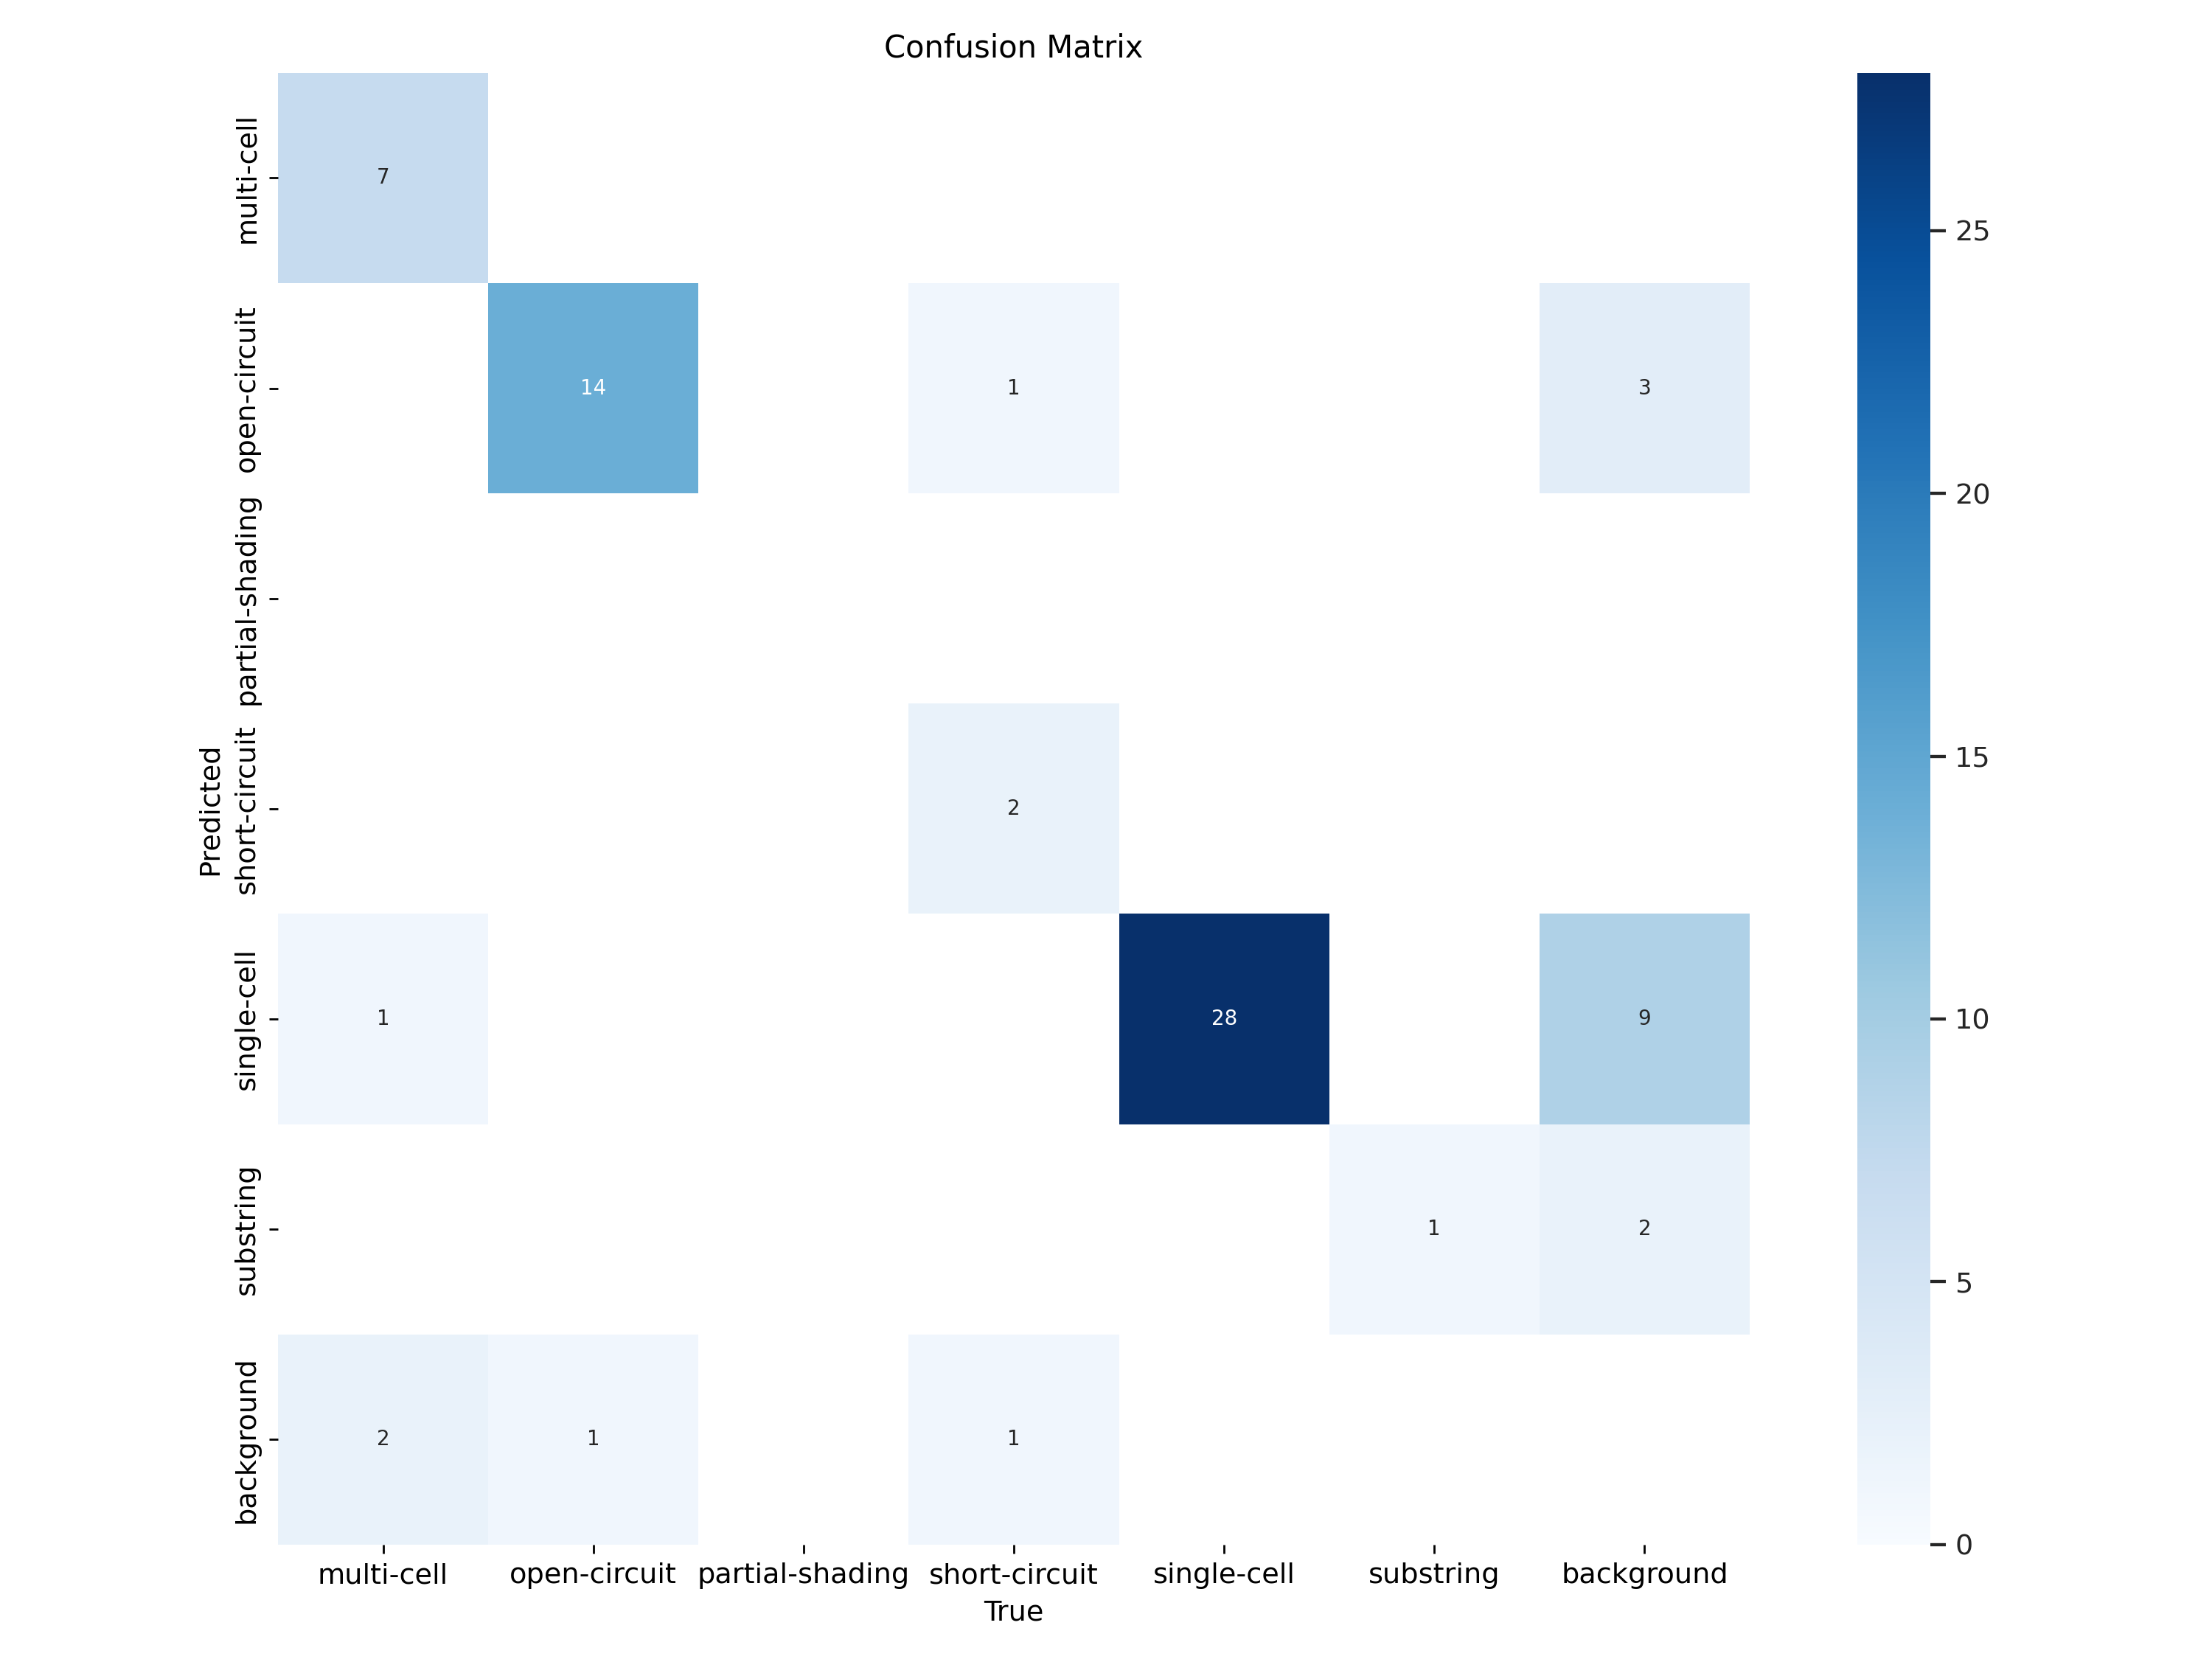

In [ ]:
conf_matrix_path = '/content/runs/detect/train/confusion_matrix.png'
Image(conf_matrix_path, width=800)

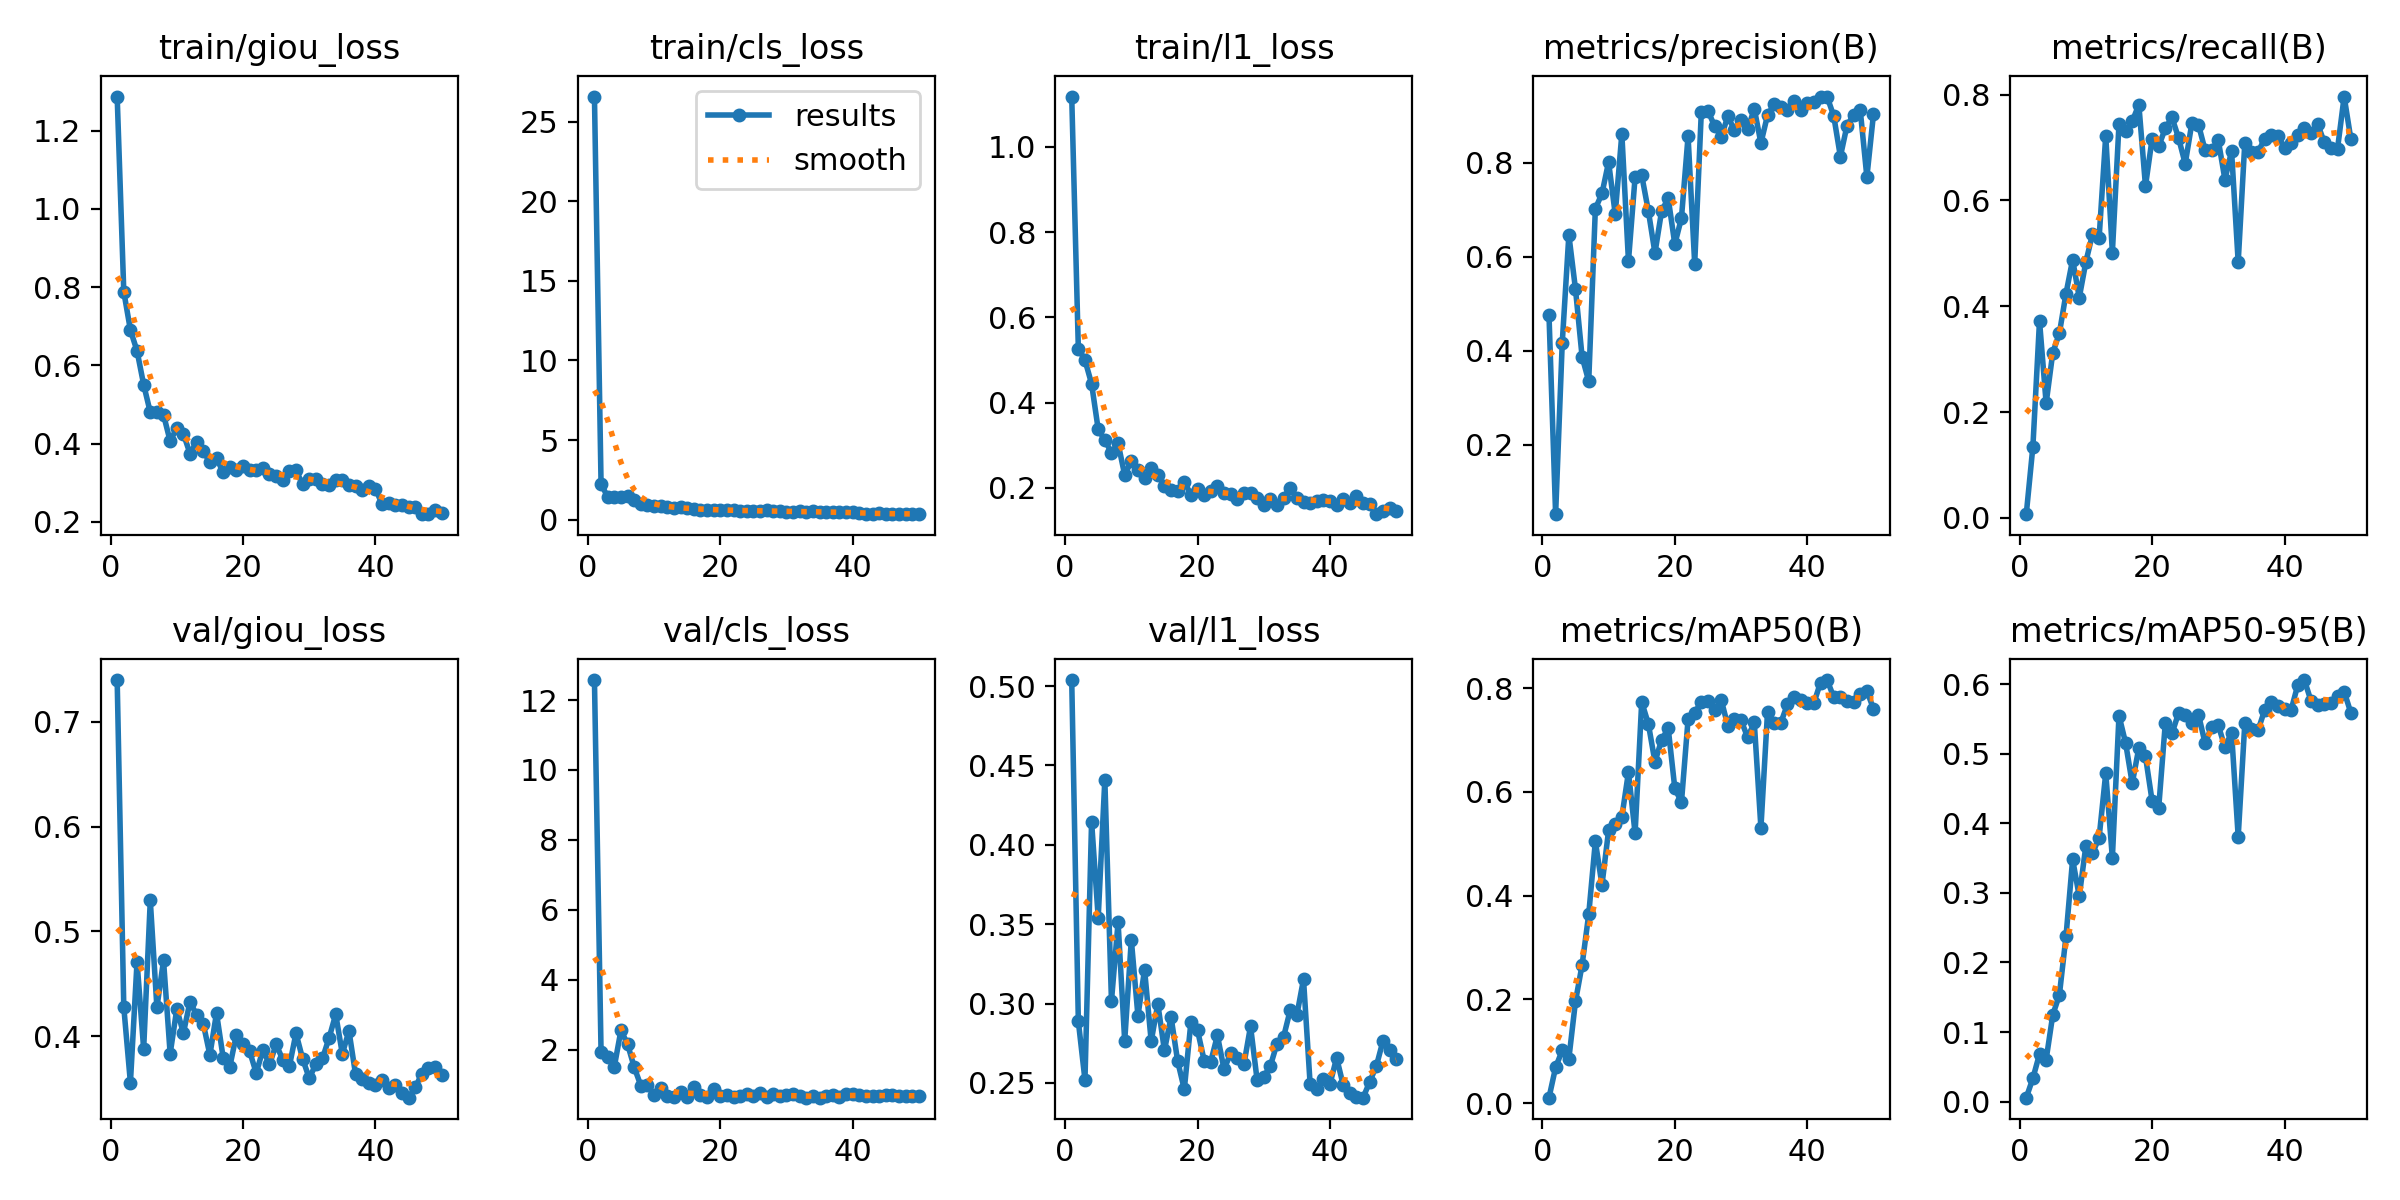

In [ ]:
results_path = '/content/runs/detect/train/results.png'
Image(results_path, width=800)

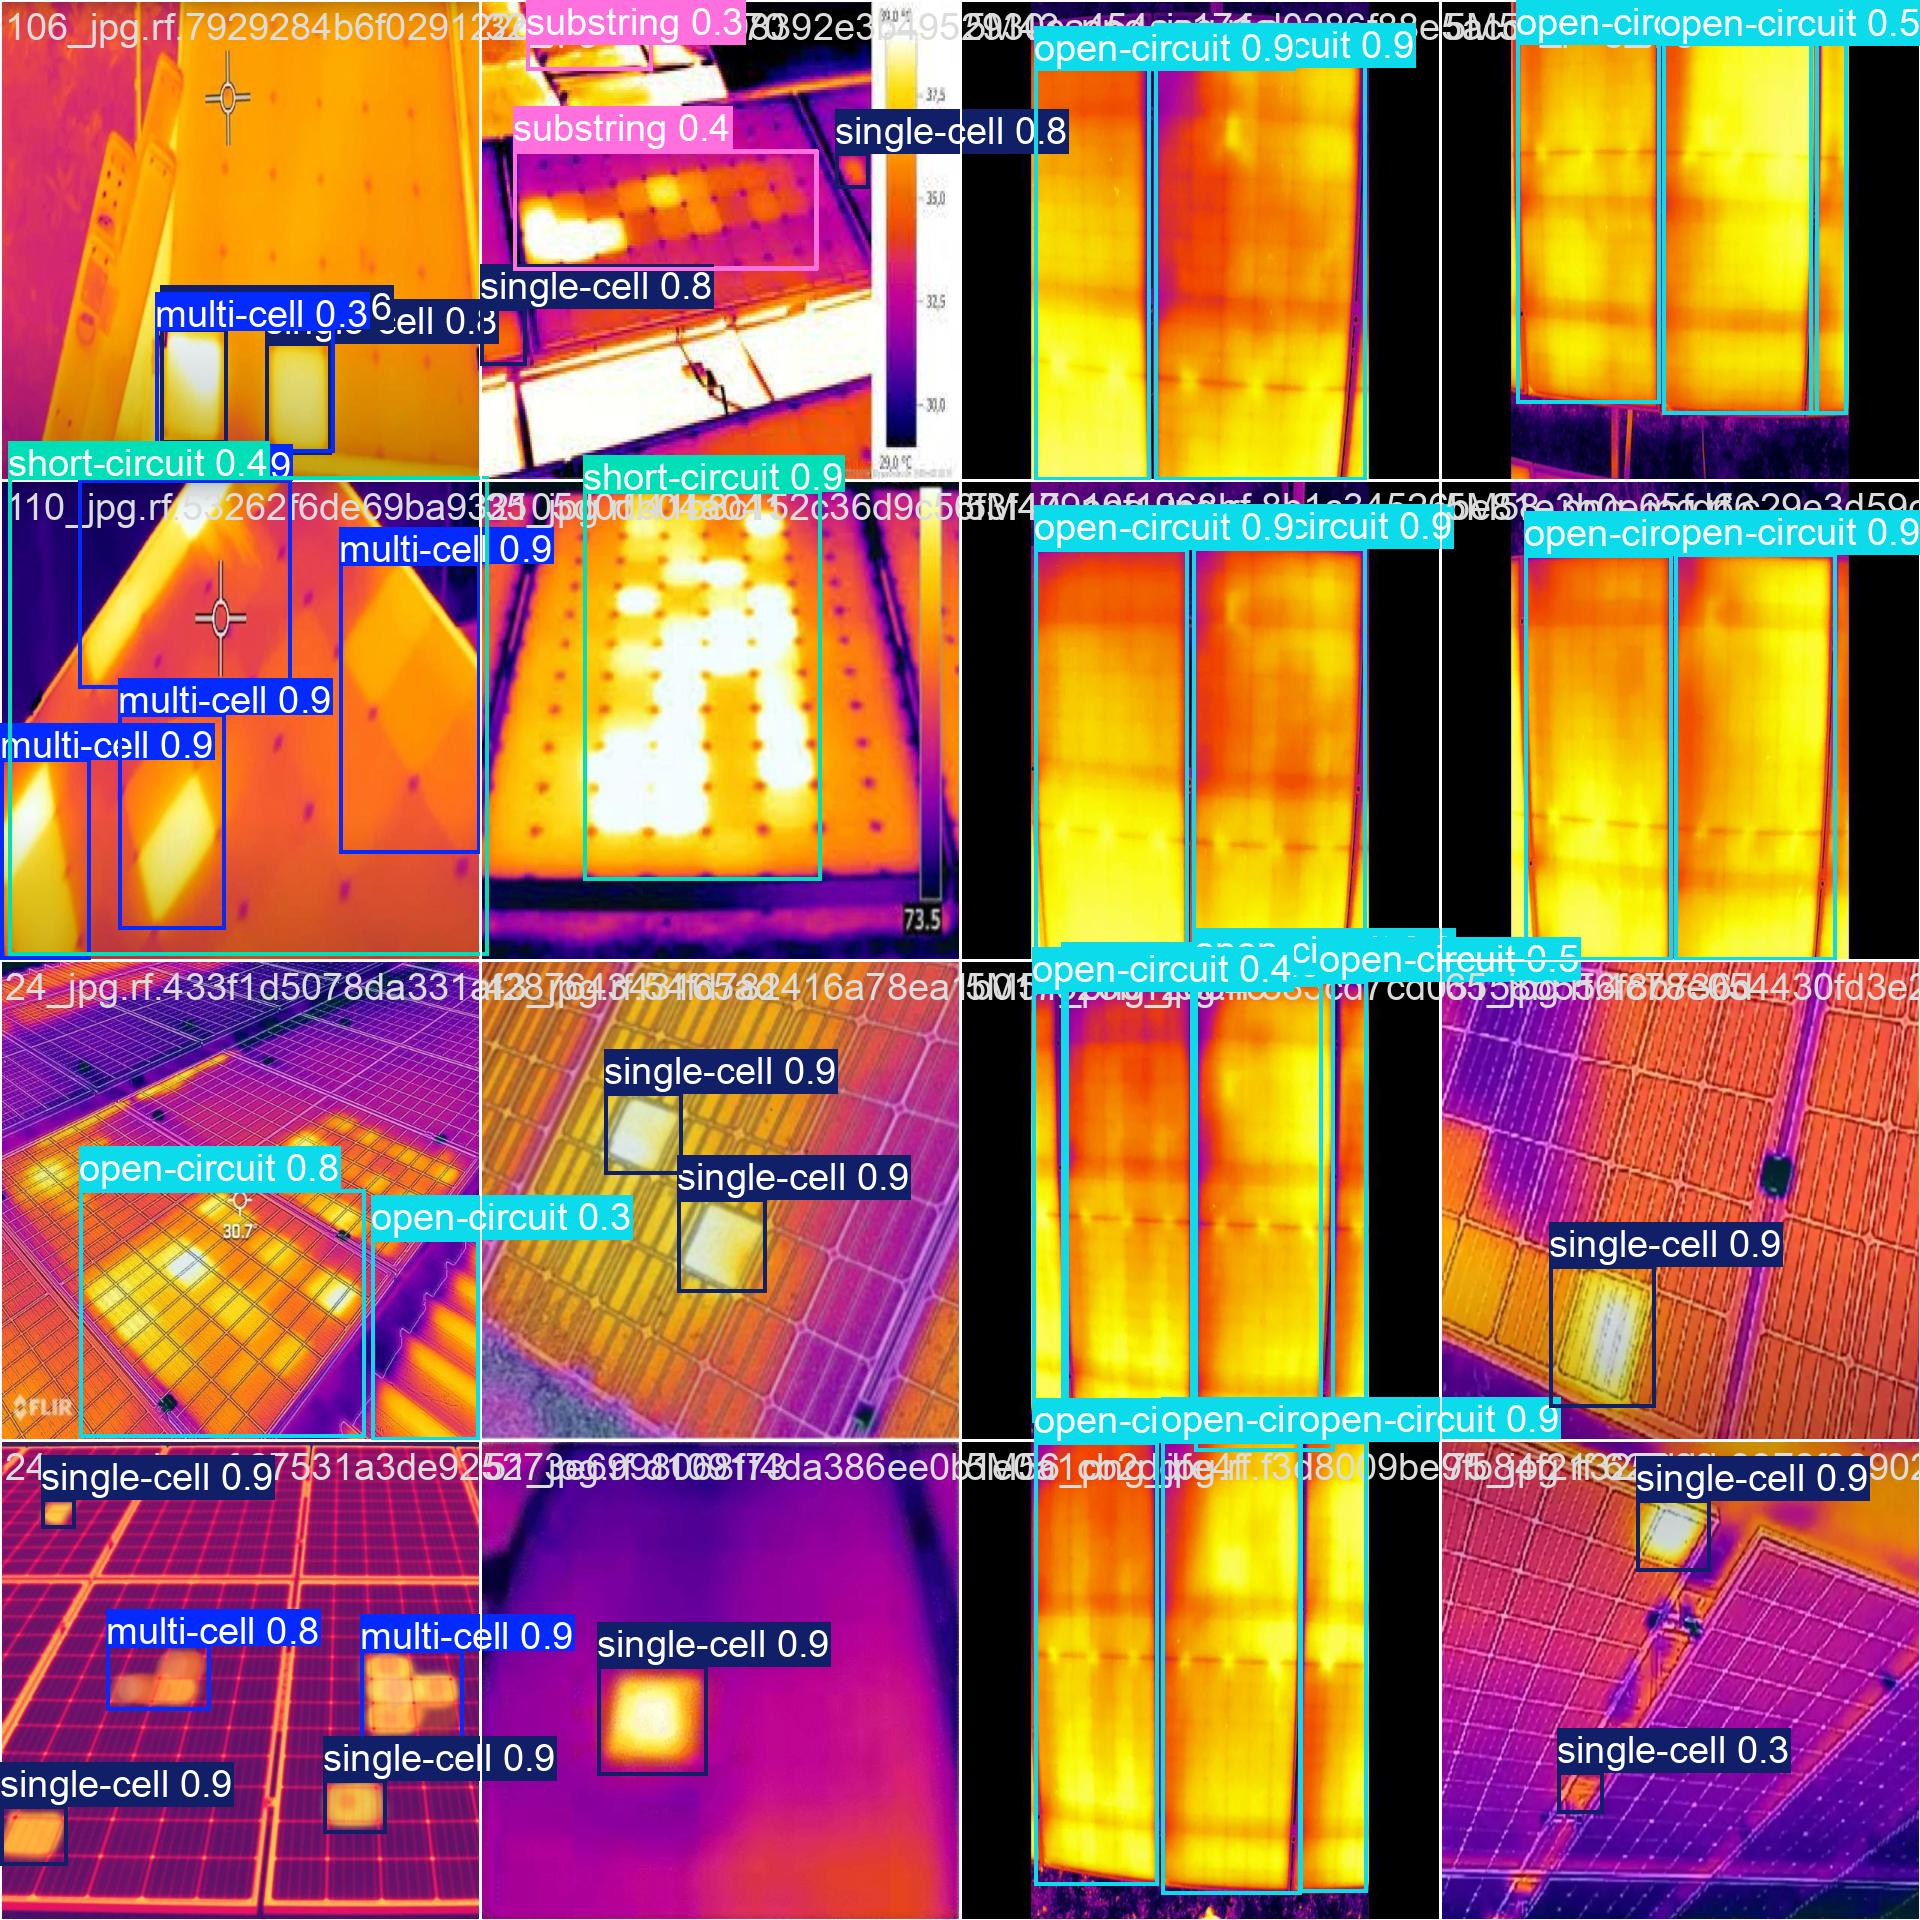

In [ ]:
val_path = '/content/runs/detect/train/val_batch0_pred.jpg'
Image(val_path, width=800)

#### Model Evaluation

In [ ]:
model = RTDETR('/content/runs/detect/train/weights/best.pt')
model.val(data=data)

Ultralytics 8.3.36 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
rt-detr-l summary: 502 layers, 31,996,070 parameters, 0 gradients, 103.5 GFLOPs


val: Scanning /content/Solar-Module-Thermal-Anaylsis-2/valid/labels.cache... 38 images, 0 backgrounds, 0 corrupt: 100%|██████████| 38/38 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.14s/it]


                   all         38         58      0.939      0.737      0.816      0.604
            multi-cell          5         10          1      0.553      0.698      0.608
          open-circuit          7         15      0.952      0.867      0.926      0.671
         short-circuit          3          4          1      0.301      0.497      0.413
           single-cell         26         28      0.843      0.964      0.963      0.625
             substring          1          1      0.902          1      0.995      0.701
Speed: 0.9ms preprocess, 60.7ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/val


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b36d6fa9000>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
        

In [ ]:
test_dir ='/content/Solar-Module-Thermal-Anaylsis-2/test/images'

results = model.predict(
    source=test_dir,
    conf=0.25,
    save=True
)


image 1/38 /content/Solar-Module-Thermal-Anaylsis-2/test/images/111_jpg.rf.df32680efb786ac205e0b5af154abb4b.jpg: 640x640 4 multi-cells, 1 short-circuit, 72.7ms
image 2/38 /content/Solar-Module-Thermal-Anaylsis-2/test/images/115_jpg.rf.58067d7c952ba8401a783177ac04a064.jpg: 640x640 4 multi-cells, 68.4ms
image 3/38 /content/Solar-Module-Thermal-Anaylsis-2/test/images/118_jpg.rf.eeccfc2bde94c81327257abd99487b41.jpg: 640x640 3 multi-cells, 67.6ms
image 4/38 /content/Solar-Module-Thermal-Anaylsis-2/test/images/126_jpg.rf.05e77e23d536279ba3c1e474b8cf5bca.jpg: 640x640 1 multi-cell, 1 single-cell, 1 substring, 67.9ms
image 5/38 /content/Solar-Module-Thermal-Anaylsis-2/test/images/17_jpg.rf.fe2152154be6fa85f5238e97bc9d202e.jpg: 640x640 3 open-circuits, 2 single-cells, 55.8ms
image 6/38 /content/Solar-Module-Thermal-Anaylsis-2/test/images/5M42_png_jpg.rf.221126a5476e4ff41014d9dee3714bf5.jpg: 640x640 3 open-circuits, 56.9ms
image 7/38 /content/Solar-Module-Thermal-Anaylsis-2/test/images/5M46_png_

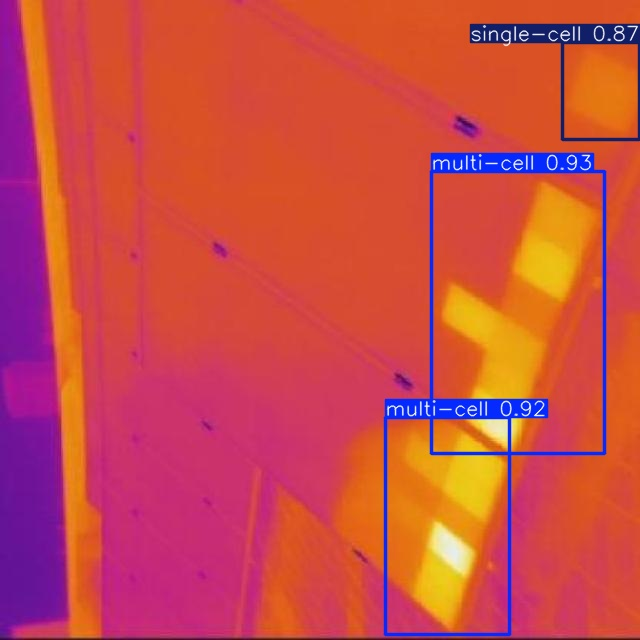

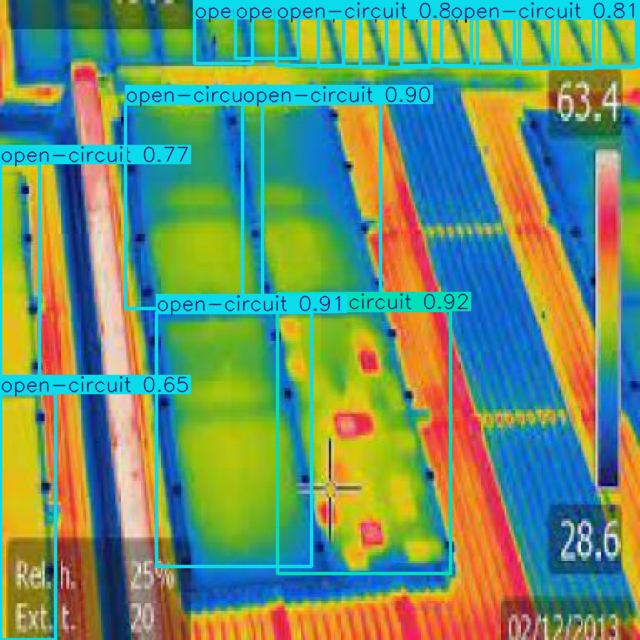

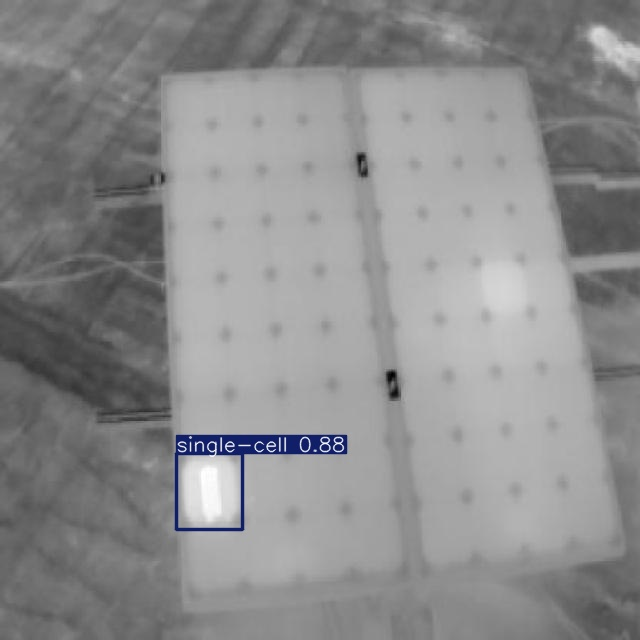

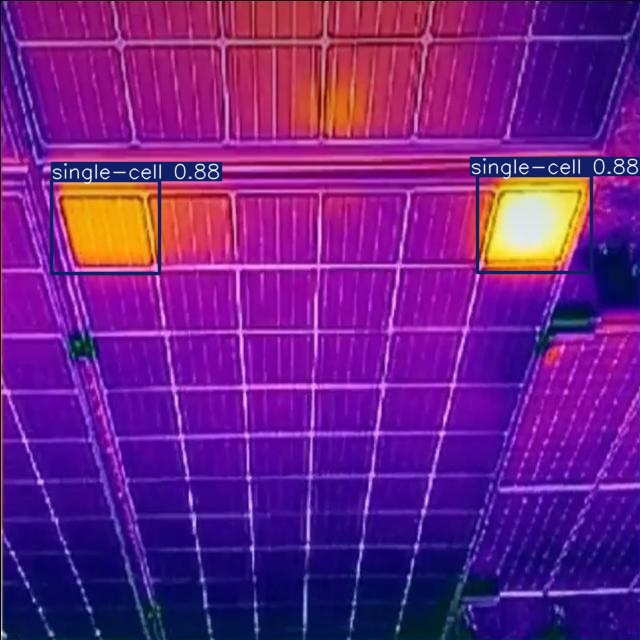

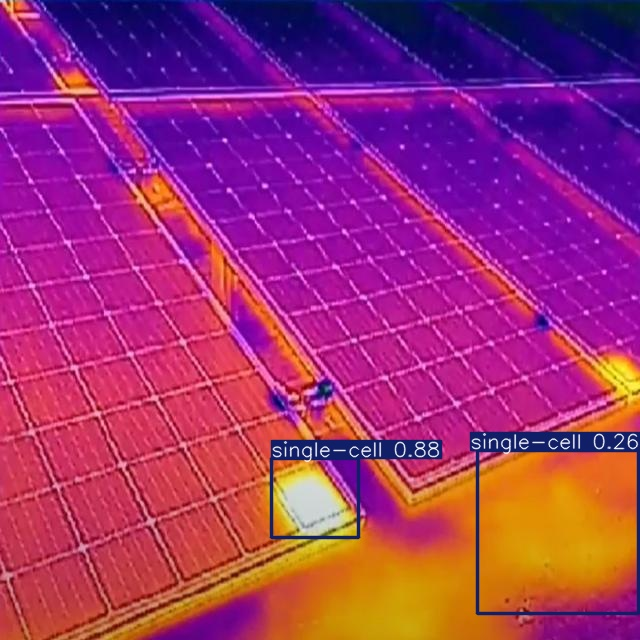

In [ ]:
# Define the base path where the folders are located
base_path = '/content/runs/detect/'

# List all directories that start with 'predict' in the base path
subfolders = [os.path.join(base_path, d) for d in os.listdir(base_path)
              if os.path.isdir(os.path.join(base_path, d)) and d.startswith('predict')]

# Find the latest folder by modification time
latest_folder = max(subfolders, key=os.path.getmtime)

image_paths = glob.glob(f'{latest_folder}/*.jpg')[:5]

# Display each image
for image_path in image_paths:
    display(Image(filename=image_path, width=300))
    print("\n")

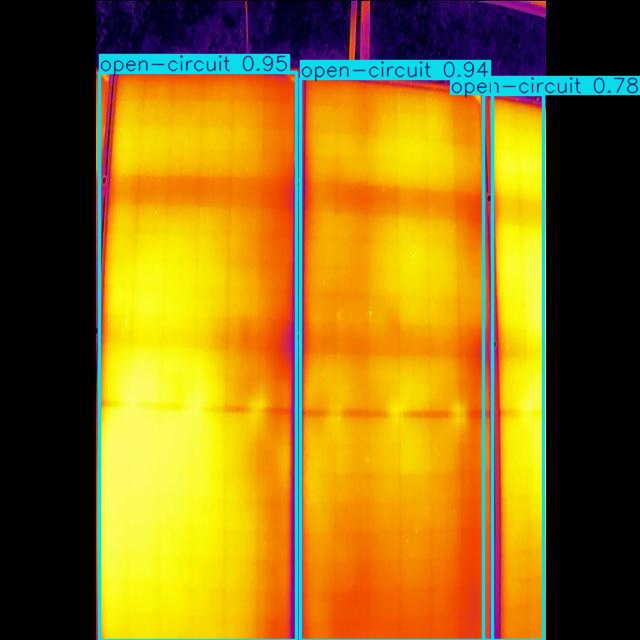

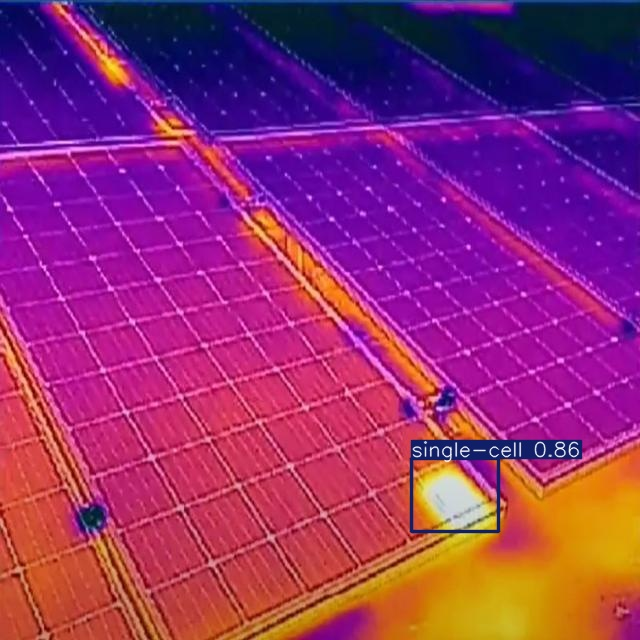

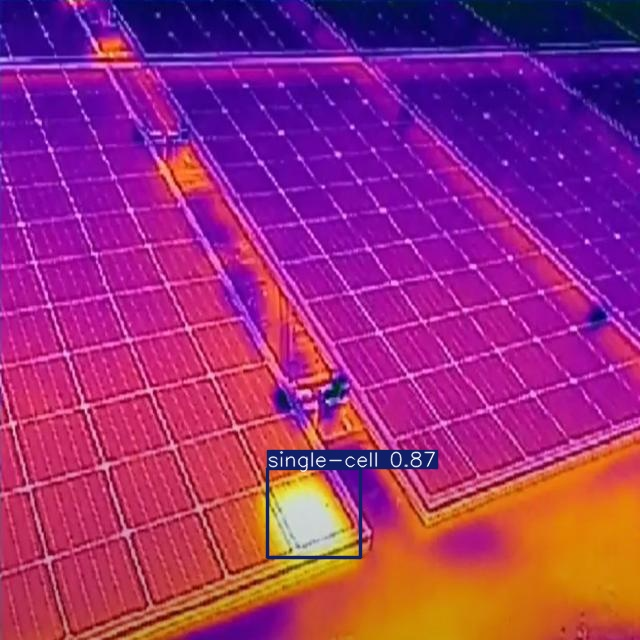

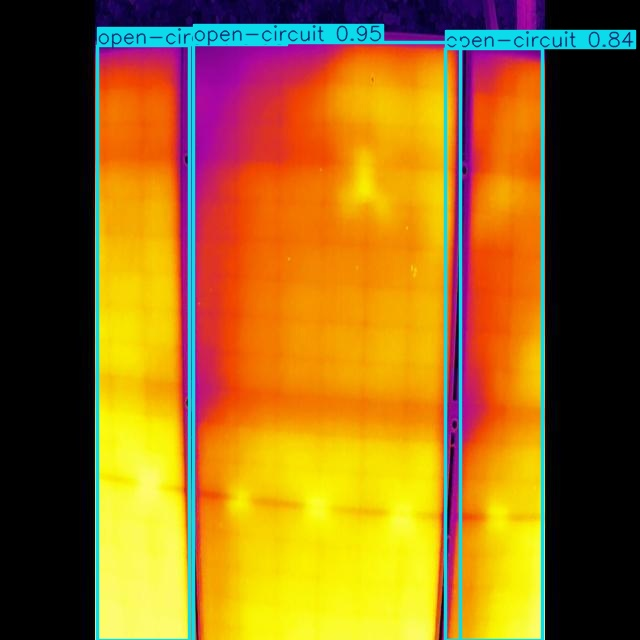

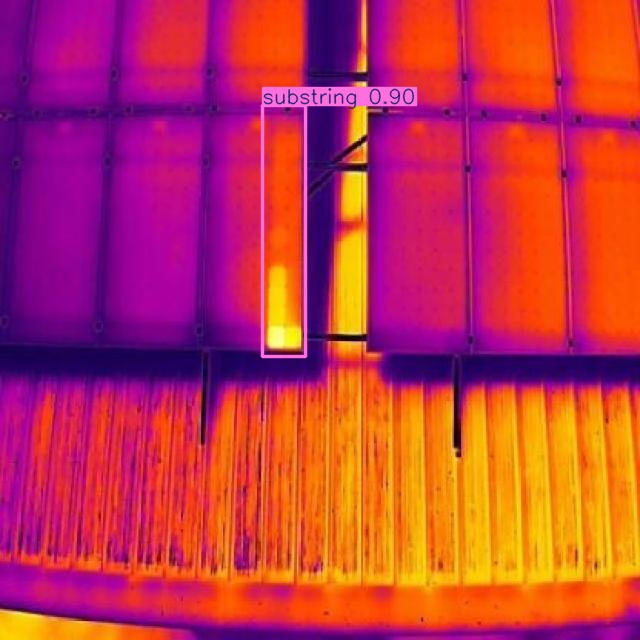

In [ ]:
image_paths = glob.glob(f'{latest_folder}/*.jpg')[5:10]

# Display each image
for image_path in image_paths:
    display(Image(filename=image_path, width=300))
    print("\n")

##### Save Model

In [ ]:
source_path = '/content/runs/detect/train/weights/best.pt'
destination_path = '/content/drive/MyDrive/PD/RT-DETR/Weights/rt-detr.pt'

shutil.copy(source_path, destination_path)
print(f"Model saved to {destination_path}")

Model saved to /content/drive/MyDrive/PD/RT-DETR/Weights/rt-detr.pt


### Evaluation of constraints

In [ ]:
import time
import psutil
from statistics import mean

In [ ]:
# Storage consumption in MB
model_size_mb = os.path.getsize(destination_path) / (1024 * 1024)
print(f"Model size: {model_size_mb:.2f} MB")

Model size: 63.09 MB


In [ ]:
# Get mAP from validation results
metrics = model.val(data=data)  # This runs validation again
mAP = metrics.box.map    # Gets the mAP50-95 metric
print(f"\nmAP50-95: {mAP:.4f}")

Ultralytics 8.3.36 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
rt-detr-l summary: 502 layers, 31,996,070 parameters, 0 gradients, 103.5 GFLOPs


val: Scanning /content/Solar-Module-Thermal-Anaylsis-2/valid/labels.cache... 38 images, 0 backgrounds, 0 corrupt: 100%|██████████| 38/38 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.01s/it]


                   all         38         58      0.939      0.737      0.816      0.604
            multi-cell          5         10          1      0.553      0.698      0.608
          open-circuit          7         15      0.952      0.867      0.926      0.671
         short-circuit          3          4          1      0.301      0.497      0.413
           single-cell         26         28      0.843      0.964      0.963      0.625
             substring          1          1      0.902          1      0.995      0.701
Speed: 0.2ms preprocess, 55.5ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/val2

mAP50-95: 0.6037


In [ ]:
test_image = '/content/Solar-Module-Thermal-Anaylsis-2/test/images/69_jpg.rf.634735dc1161151b3ef5b7c8d02bee88.jpg'

In [ ]:
# Calculate inference time (average of 5 runs)
inference_times = []

for _ in range(5):
    start_time = time.time()
    _ = model.predict(test_image)
    inference_times.append(time.time() - start_time)

avg_inference_time = mean(inference_times)
print(f"\nAverage inference time: {avg_inference_time:.3f} seconds")


image 1/1 /content/Solar-Module-Thermal-Anaylsis-2/test/images/69_jpg.rf.634735dc1161151b3ef5b7c8d02bee88.jpg: 640x640 2 single-cells, 106.2ms
Speed: 10.0ms preprocess, 106.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/Solar-Module-Thermal-Anaylsis-2/test/images/69_jpg.rf.634735dc1161151b3ef5b7c8d02bee88.jpg: 640x640 2 single-cells, 102.1ms
Speed: 4.7ms preprocess, 102.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/Solar-Module-Thermal-Anaylsis-2/test/images/69_jpg.rf.634735dc1161151b3ef5b7c8d02bee88.jpg: 640x640 2 single-cells, 73.1ms
Speed: 2.4ms preprocess, 73.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/Solar-Module-Thermal-Anaylsis-2/test/images/69_jpg.rf.634735dc1161151b3ef5b7c8d02bee88.jpg: 640x640 2 single-cells, 62.3ms
Speed: 1.6ms preprocess, 62.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/Solar-Module-Th

In [ ]:
# GPU Memory used during training
gpu_memory_gb = torch.cuda.max_memory_allocated() / (1024**3)
print(f"Peak GPU memory usage during training: {gpu_memory_gb:.2f} GB")

Peak GPU memory usage during training: 11.67 GB


`50 epochs completed in 0.401 hours.`